## Sandbox for marching squares

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw

In [2]:
def center_ellipse(x,y,r,c):

    draw.ellipse([x - r, y - r, x + r, y + r],fill=c)

def center_rectangle(x,y,l,w,c):
    l = l/2
    w = w/2
    draw.rectangle([x - w, y - l, x + w, y + l],fill=c)

Flood Filling

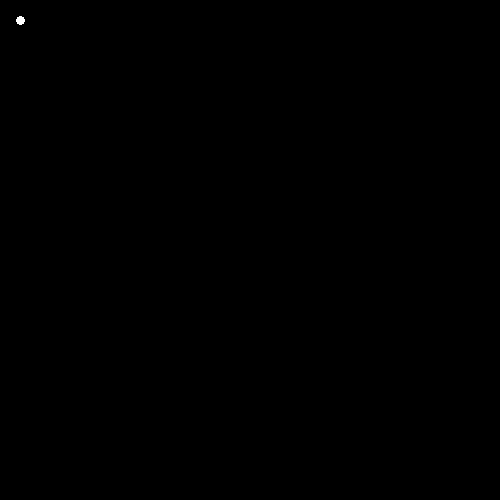

In [6]:
image_resolution = 500

img = Image.new('RGB', (image_resolution, image_resolution))
draw = ImageDraw.Draw(img)

threshold = 0.5

center_ellipse(20, 20, 4, f'rgb({255},{255},{255})')
img

# img.save('pixels.png')

Lattices

In [6]:
# image_resolution = 1080

# img = Image.new('RGB', (image_resolution, image_resolution))
# draw = ImageDraw.Draw(img)

# def draw_cell(unit_cell, coords):
#     for beam in unit_cell.beams:
#         x1 = coords[beam[0]][0]
#         y1 = coords[beam[0]][1]
#         x2 = coords[beam[1]][0]
#         y2 = coords[beam[1]][1]
#         draw.line([x1, y1, x2, y2], fill="white",width=10)

# unit_cell = UnitCell("SC")
# scale = 100
# unit_cell.x_scale = scale
# unit_cell.y_scale = scale
# lattice = Lattice(unit_cell, 5, 5)
# i = 0
# coords = lattice.return_cell_coords(0,0)
# for coords in lattice.return_all_cell_coords():
#     draw_cell(unit_cell, coords)
# # for coords in lattic coords)
# img.save('pixels.png')